In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
class BatsmenState(TypedDict):
    """State structure for batsmen analysis"""
    run: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    boundary_percentage: float
    balls_per_boundary: float
    summary: str

In [8]:
def calculate_strike_rate(state: BatsmenState):
    """Calculate the strike rate of a batsman."""
    sr = (state['run'] / state['balls']) * 100 if state['balls'] > 0 else 0
    return {'strike_rate': sr}

In [9]:
def calculate_boundary_percentage(state: BatsmenState):
    """Calculate the boundary percentage of a batsman."""
    total_boundaries = state['fours'] + state['sixes']
    bp = (total_boundaries / state['balls']) * 100 if state['balls'] > 0 else 0
    return {'boundary_percentage': bp}

In [10]:
def calculate_balls_per_boundary(state: BatsmenState):
    """Calculate the balls per boundary"""
    total_boundaries = state['fours'] + state['sixes']
    bpb = state['balls'] / total_boundaries
    return {'bpb': bpb}

In [11]:
def calculate_summary(state: BatsmenState):
    """Generate a summary of the batsman's performance."""
    summary = (f"Batsman scored {state['run']} runs off {state['balls']} balls, "
               f"with a strike rate of {state['strike_rate']:.2f} and "
               f"a boundary percentage of {state['boundary_percentage']:.2f}%.")
    return {'summary': summary}

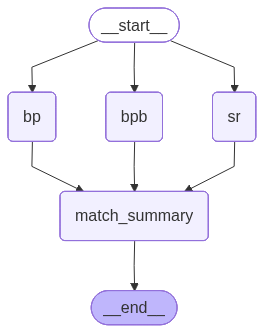

In [14]:
graph = StateGraph(BatsmenState)

# add nodes
graph.add_node('sr', calculate_strike_rate)
graph.add_node('bp', calculate_boundary_percentage)
graph.add_node('bpb', calculate_balls_per_boundary)
graph.add_node('match_summary', calculate_summary)

# add edges
graph.add_edge(START, 'sr')
graph.add_edge(START, 'bp')
graph.add_edge(START, 'bpb')

graph.add_edge('sr', 'match_summary')
graph.add_edge('bp', 'match_summary')
graph.add_edge('bpb', 'match_summary')
graph.add_edge('match_summary', END)

app = graph.compile()
app

In [15]:
res = app.invoke({'run':100, 'balls':60, 'fours':8, 'sixes':2})
print(res)

{'run': 100, 'balls': 60, 'fours': 8, 'sixes': 2, 'strike_rate': 166.66666666666669, 'boundary_percentage': 16.666666666666664, 'summary': 'Batsman scored 100 runs off 60 balls, with a strike rate of 166.67 and a boundary percentage of 16.67%.'}
